<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase01/Clase01c_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clase 1 - Análisis exploratorio de datos (EDA)**

En este cuaderno, repasamos los pasos básicos del análisis exploratorio de datos (EDA) que tienen como objetivo descubrir patrones y detectar anomalías que ayuden a tomar decisiones para el desarrollo de modelos de ML en datos tabulares.

1. <a href="#1">Leer la base de datos</a>
2. <a href="#2">Estadísticas generales</a>
3. <a href="#3">Estadísticas univariadas: Graficas básicas</a>
4. <a href="#4">Estadísticas multivariadas: Gráficas de dispersión y correlación</a>
5. <a href="#5">Manejo de valores faltantes</a>
  - <a href="#51">Descartar columnas con valores perdidos</a>
  - <a href="52">Descartar filas con valores perdidos</a>
  - <a href="53">Imputar valores perdidos con ``pandas``</a>
  - <a href="54">Imputar valores perdidos con ``sklenar``</a>

## **Datos**
En este ejercicio, se trabaja con datos de adopción de mascotas del Austin Animal Center. Se cuenta con dos conjuntos de datos que cubren la entrada y la salida de los animales.

Para trabajar con una sola tabla, se unen las tablas de ingreso y salida utilizando la columna "Animal ID" y se crea un solo archivo review.csv. Tampoco se consideran animales con múltiples entradas al centro para mantener el conjunto de datos simple.

**Descripción de las características:**

- __Pet ID:__ ID único de cada mascota.
- __Outcome Type:__ Estado de la mascota en el momento de registrar el resultado (0 = no ubicado, 1 = ubicado). Este es el campo a predecir.
- __Sex upon Outcome:__ - Sexo de la mascota a la salida del centro.
- __Name:__ Nombre de la mascota  
- __Found Location:__ - Ubicación de la mascota antes de entrar al centro
- __Intake Type:__ - Circunstancias que hicieron que la mascota llegara al centro
- __Intake Condition:__ Condiciones de salud de la mascota cuando entró al centro
- __Pet Type:__ Tipo de mascota
- __Sex upon Intake:__ Sexo de la mascota cuando entró al centro
- __Breed__ - Raza de la mascota
- __Color__ - Color de la mascota
- __Age upon Intake Days:__ Edad de la mascota cuando entró al centro (días)
- __Age upon Outcome Days:__ Edad de la mascota cuando salió del centro (días)

## 1. <a name="1">Leer la base de datos</a>

Vamos a cargar la base de datos en un ``dataframe`` usando ``Pandas``

In [10]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL' -O data.csv

--2023-08-08 23:07:51--  https://docs.google.com/uc?export=download&id=1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL
Resolving docs.google.com (docs.google.com)... 142.251.107.100, 142.251.107.113, 142.251.107.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.107.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u30b4836g5tsih0osdbpielvrij72f7q/1691536050000/02109188480849179502/*/1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL?e=download&uuid=f460c35a-6792-49c8-b2c1-30af3bb8d9e4 [following]
--2023-08-08 23:07:51--  https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/u30b4836g5tsih0osdbpielvrij72f7q/1691536050000/02109188480849179502/*/1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL?e=download&uuid=f460c35a-6792-49c8-b2c1-30af3bb8d9e4
Resolving doc-0g-bk-docs.googleusercontent.com (doc-0g-bk-docs.googleusercontent.com)... 74.125.141.132, 2607:f

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

In [11]:
# Carga el archivo csv
df = pd.read_csv('data.csv')
print(f'El tamaño del dataset es: {df.shape}')

El tamaño del dataset es: (95485, 13)


## 2. <a name="2">Estadísticas generales</a>
Vamos a obtener el número de filas (ejemplos), número de columnas (características) y algunos estadísticos simples de la base de datos

In [ ]:
# Imprime las primeras cinco filas
# NaN significa que hay valores faltantes
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [ ]:
# Tipos de datos y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [ ]:
# Calcula estadísticas básicas para las columnas numéricas
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


Separemos las características de la variable objetivo

In [ ]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


In [ ]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


Podemos explorar más a fondo el conjunto de características, separandolas entre características numéricas y categóricas. Tenga en cuenta que algunas características con valores enteros, a pesar de ser numéricas, pueden ser categóricas, y algunas variables categóricas pueden ser texto.



In [ ]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


## 3. <a name="3">Estadística univariada: Gráficas básicas</a>

En esta sección, se examinarán los datos con gráficas. __Nota:__ Estas gráficas igonar valores faltantes o nulos. Se aprenderá a trabajar con datos faltantes en la próxima sección.

__Bar plots:__ Estas gráficas muestran conteos en variables categóricas. La función ``value_counts()`` calcula los conteos para cada valor único.

Primero, se calcula la distribución de la variable objetivo

In [ ]:
df[model_target].value_counts()

1.0    53854
0.0    41631
Name: Outcome Type, dtype: int64

Para hacer la gráfica se utilizará la función ``plot.bar`` de ``matplotlib.pyplot``

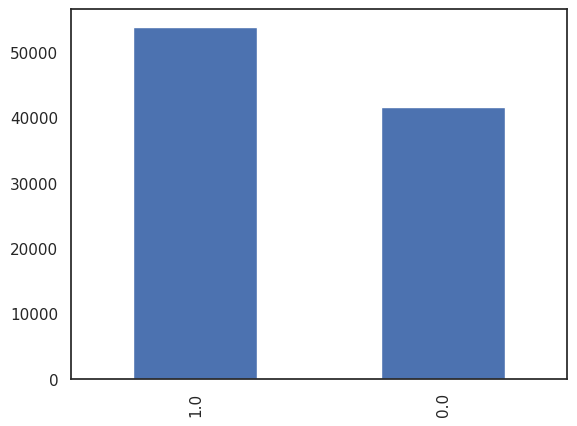

In [ ]:
df[model_target].value_counts().plot.bar()
plt.show()

Ahora se calcula la distribución de todas las variables categóricas

In [ ]:
for c in categorical_features_all:
  print(df[c].value_counts())

A794011    1
A666713    1
A725018    1
A757574    1
A737442    1
          ..
A758938    1
A779434    1
A699290    1
A779183    1
A815419    1
Name: Pet ID, Length: 95485, dtype: int64
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: Sex upon Outcome, dtype: int64
Bella          338
Luna           313
Max            311
Daisy          239
Lucy           223
              ... 
Ewok             1
*Clouseau        1
*Minky           1
Tigger Lily      1
*Squanchy        1
Name: Name, Length: 17468, dtype: int64
Austin (TX)                                  14833
Travis (TX)                                   1402
7201 Levander Loop in Austin (TX)              644
Outside Jurisdiction                           607
Del Valle (TX)                                 426
                                             ...  
Cherry Creek On  Brodie Ln in Austin (TX)        1
Cameron Rd At Parmer Ln in Austin (TX)           1
303 W.

Basándonos en el número de valores únicos (los ID únicos, por ejemplo, no serán muy útiles para visualizar), para algunas características categóricas, veamos algunas visualizaciones de gráficos de barras. Por simplicidad y rapidez, aquí solo mostramos gráficos de barras para aquellas características con menos de 50 valores únicos.

Sex upon Outcome


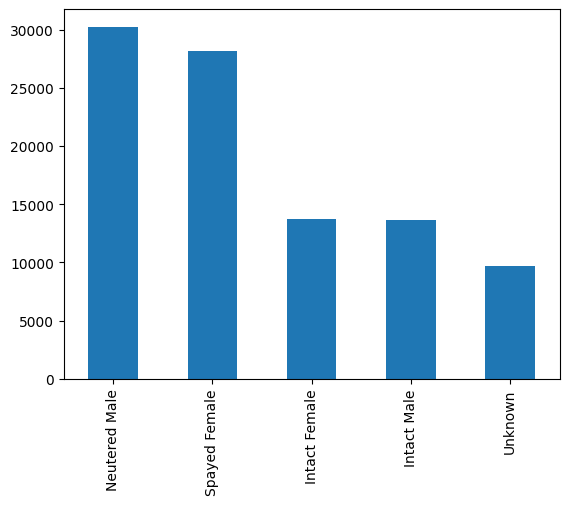

Intake Type


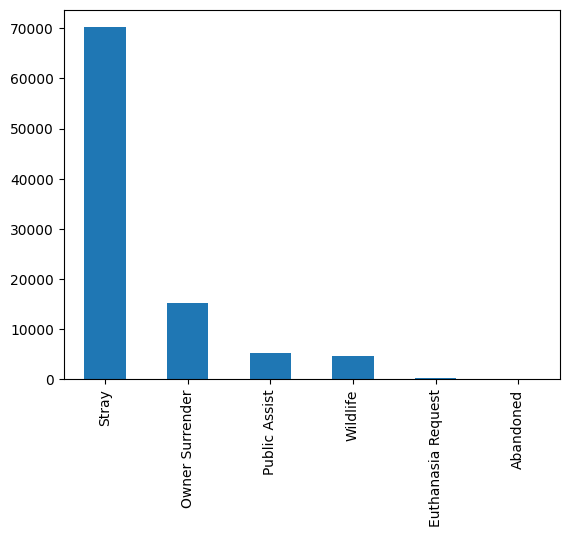

Intake Condition


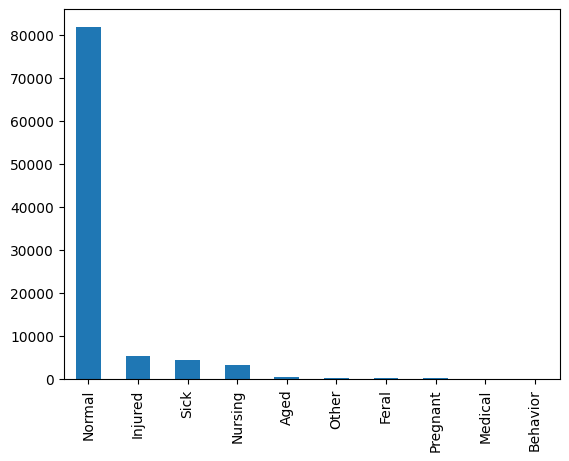

Pet Type


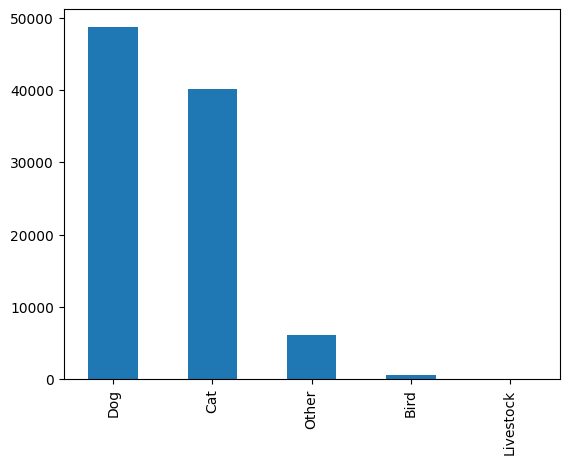

Sex upon Intake


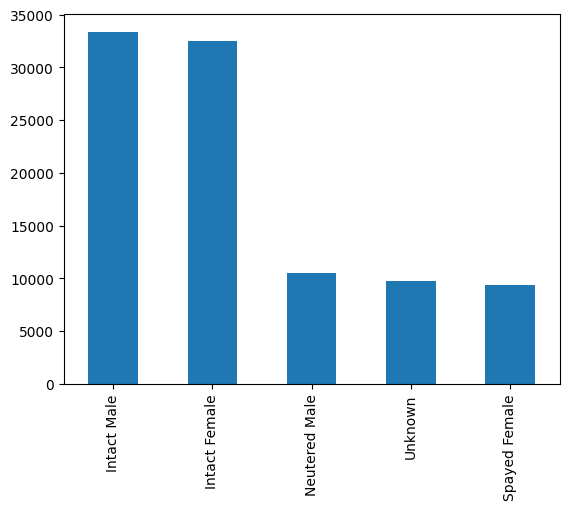

In [ ]:
for c in categorical_features_all:
    if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

__Histogramas:__ Los histogramas muestran la distribución de las características numéricas. Los datos se dividen en _bins_

Age upon Intake Days


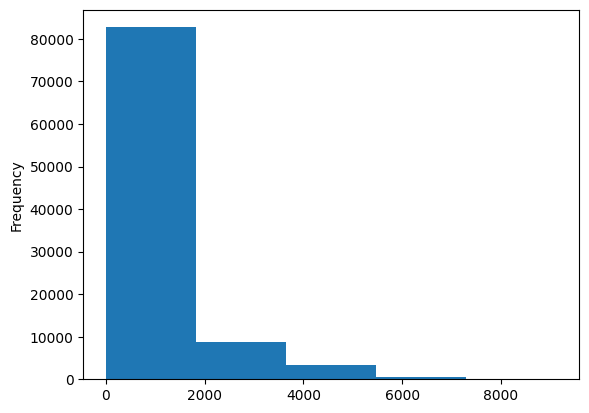

Age upon Outcome Days


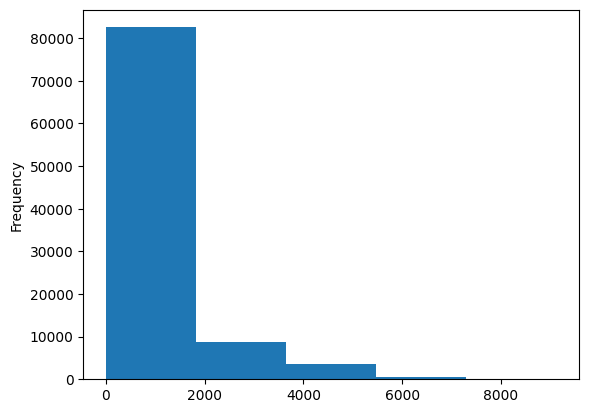

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

Si para algunos histogramas los valores están fuertemente ubicados en el primer intervalo, es bueno revisar los valores atípicos, ya sea verificando los valores mínimos y máximos de esas características particulares y/o explorando rangos de valores.

In [ ]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


Con la función ``value_counts()`` se puede incrementar el número de _bins_ de los histogramas a 10 para tener una vista más refinada de las características numéricas.

In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


Si se identifican outliers (valores muy probablemente erróneos) eliminarlos podría mejorar los histogramas y, posteriormente, el rendimiento general del modelo. Si bien una buena regla general es que cualquier valor que no esté en el rango de (Q1 - 1.5 IQR) y (Q3 + 1.5 IQR) es un outlier, también deben considerarse otras reglas para eliminar outliers. Por ejemplo, eliminar cualquier valor en el 1% superior.

In [ ]:
for c in numerical_features_all:
    print(c)

    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)

    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)

    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max()*9/10].index
    df.drop(dropIndexes , inplace=True)

Age upon Intake Days
Age upon Outcome Days


In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: Age upon Outcome Days, dtype: int64


Se obtienen de nuevo los histogramas con un mayor número de _bins_ para la visualización

Age upon Intake Days


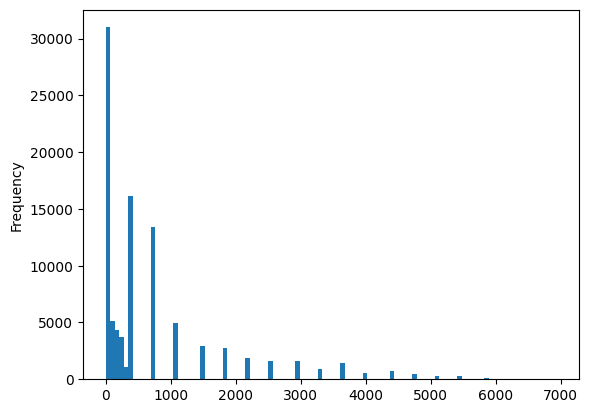

Age upon Outcome Days


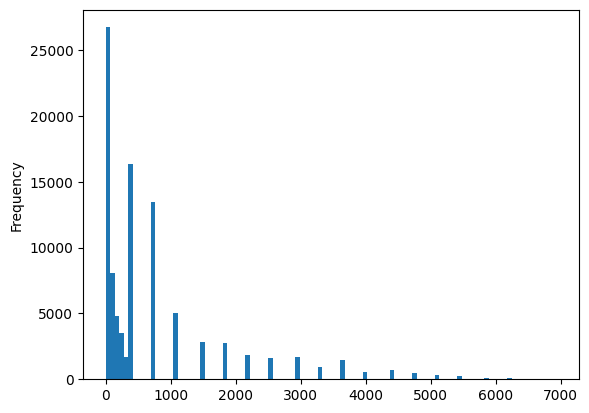

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=100)
    plt.show()

## 4. <a name="4">Estadísticas multivariadas: Gráficas de dispersión y correlación</a>

__Scatter plot:__ Los gráficos de dispersión son gráficas en 2D de dos variables numéricas que puede ser utilizado para explorar su relación.

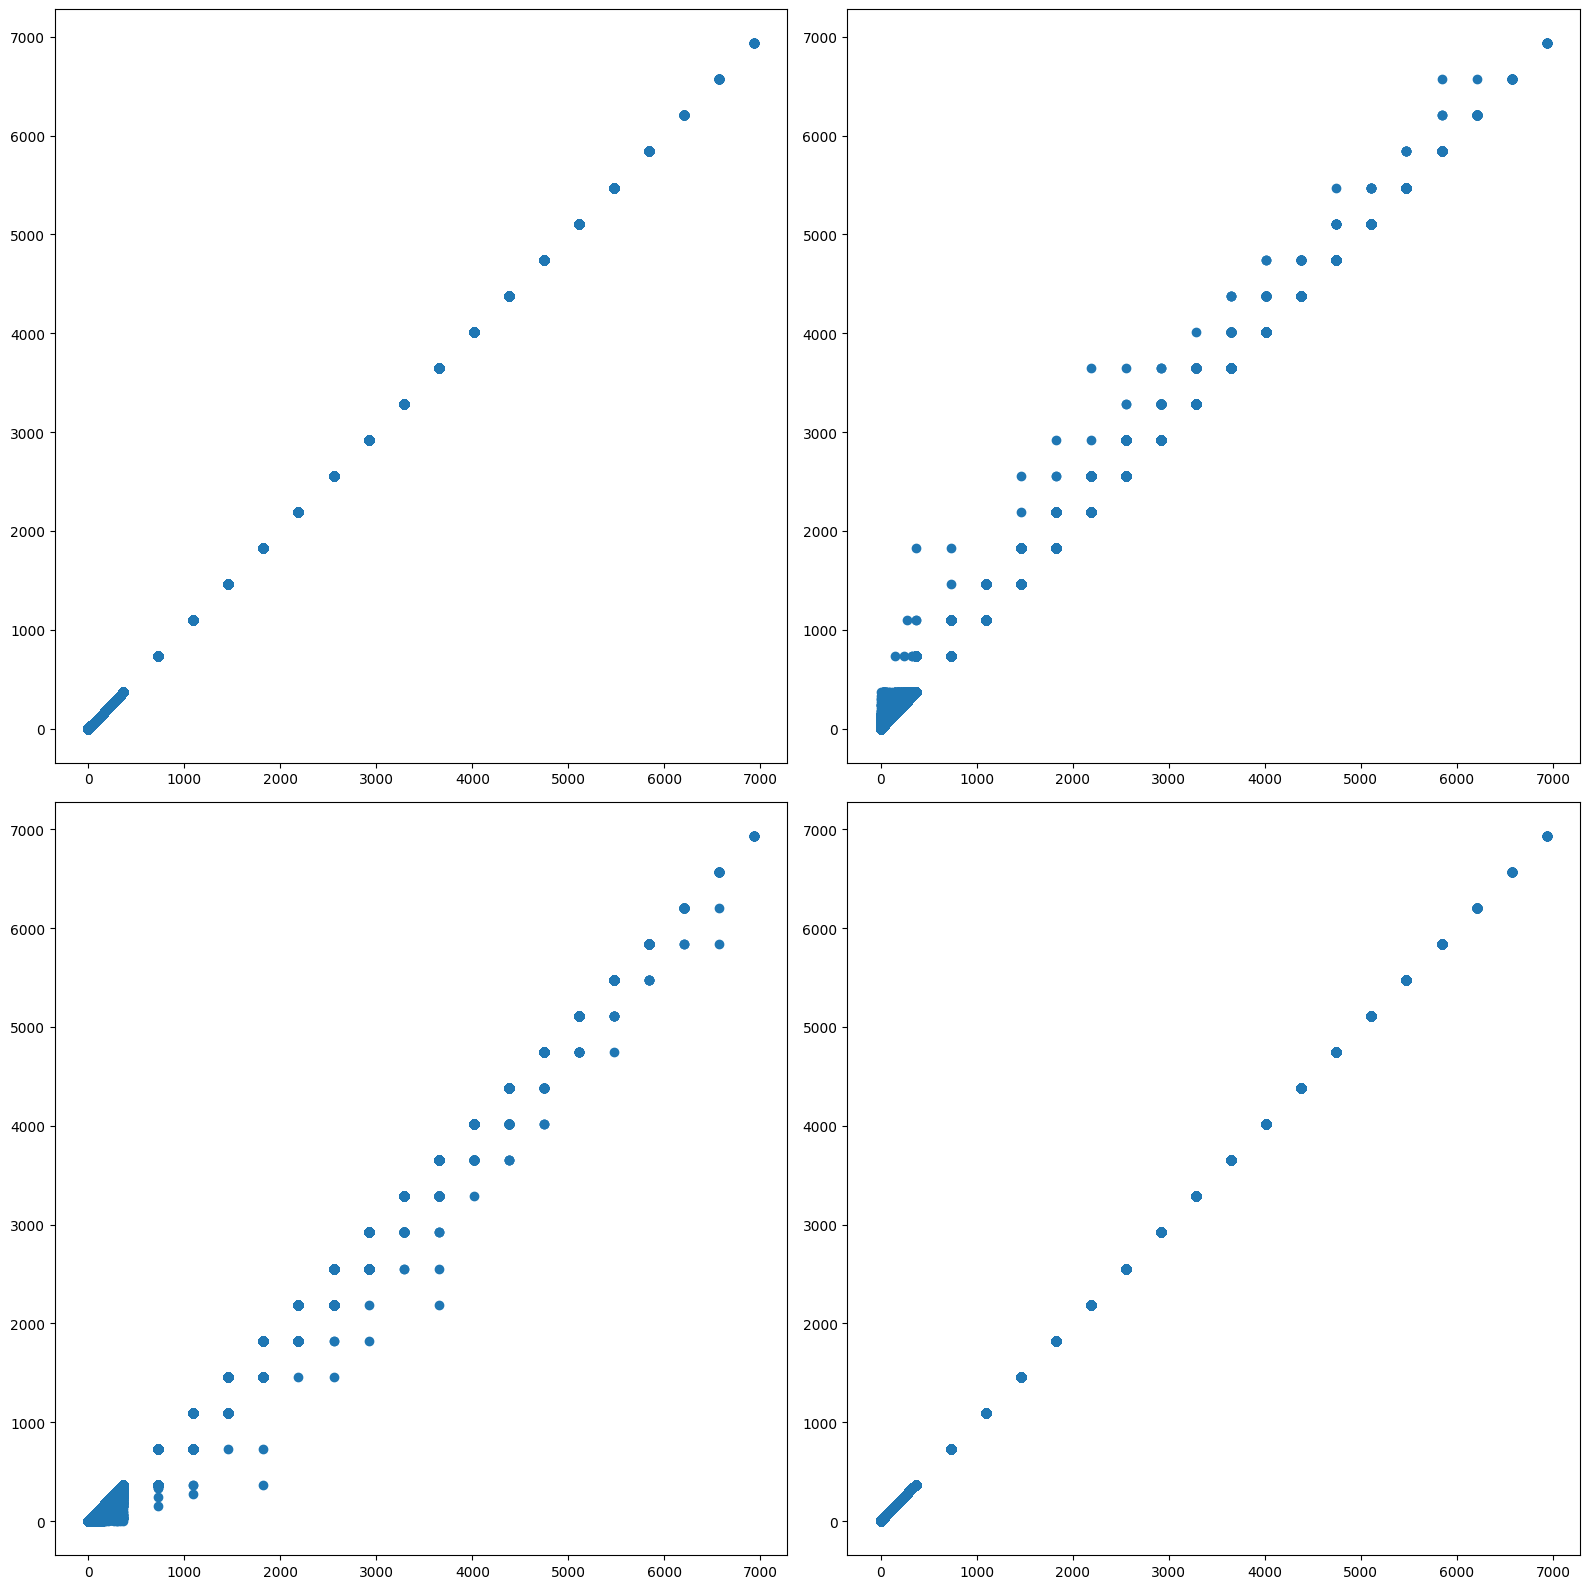

In [ ]:
fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
for i in range(0,len(numerical_features_all)):
    for j in range(0,len(numerical_features_all)):
        axes[i,j].scatter(x = df[numerical_features_all[i]], y = df[numerical_features_all[j]])
fig.tight_layout()

__Scatter plot con identificación:__ Se puede agregar la variable objetivo (0 o 1) a la gráfica de dispersión


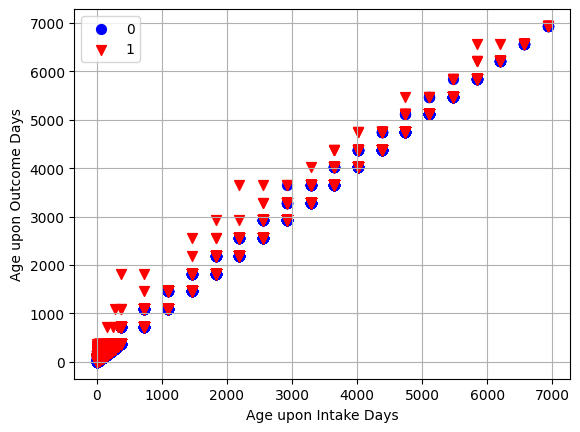

In [ ]:
X1 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 0]
X2 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 1]

plt.scatter(X1.iloc[:,0],
            X1.iloc[:,1],
            s=50,
            c='blue',
            marker='o',
            label='0')

plt.scatter(X2.iloc[:,0],
            X2.iloc[:,1],
            s=50,
            c='red',
            marker='v',
            label='1')

plt.xlabel(numerical_features_all[0])
plt.ylabel(numerical_features_all[1])
plt.legend()
plt.grid()
plt.show()

Los diagramas de dispersión con identificación, a veces pueden ayudar a identificar si podemos lograr una buena separación entre los puntos de datos, basándonos únicamente en estas dos características numéricas.

__Correlación:__ La correlación muestra un valor entre -1 y 1 que dice que tan linealmente relacionadas están las variables numéricas. Las correlaciones se pueden mostrar como una matrix o en un mapa de calor

In [ ]:
cols=[numerical_features_all[0], numerical_features_all[1]]
#print(df[cols].corr())
df[cols].corr().style.background_gradient(cmap='tab20c')

,Age upon Intake Days,Age upon Outcome Days
Age upon Intake Days,1.000000,0.998839
Age upon Outcome Days,0.998839,1.000000


Similar a los gráficos de dispersión, los valores de la matriz de correlación pueden identificar más claramente las relaciones entre las características numéricas. Los valores de correlación de -1 significan una correlación negativa perfecta, 1 significa una correlación positiva perfecta y 0 significa que no hay relación entre las dos características numéricas.

Ejemplo para la base de datos

<ipython-input-23-afb442b5d7ab>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

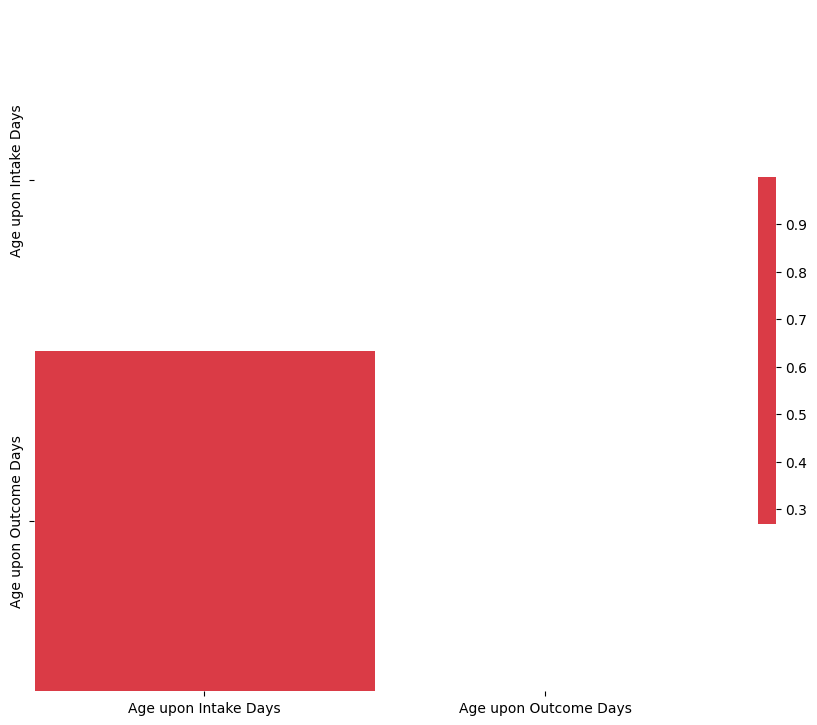

In [ ]:
cols=[numerical_features_all[0], numerical_features_all[1]]
corr = df[cols].corr()

# Genera una máscara para la triangular superior
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Inicializa la figura en matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Genera un mapa de colores personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibuja el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Ejemplo para datos generados aleatoriamente

<ipython-input-24-27ebbbfd2979>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

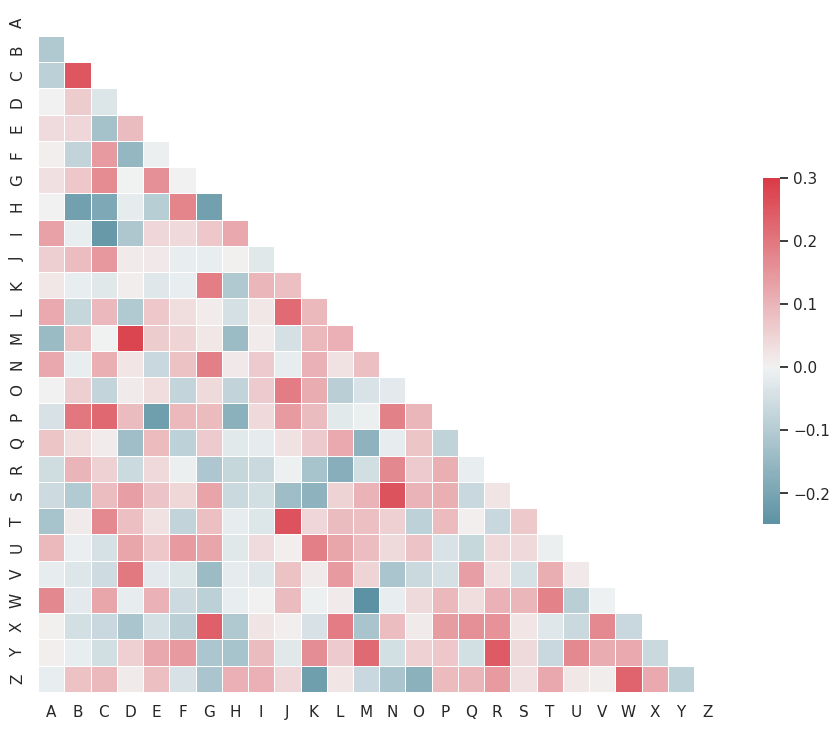

In [ ]:
sns.set(style="white")

# Genera un dataset aleatorio
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Calcula la matriz de correlación
corr = d.corr()

# Genera una máscara para la triangular superior
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Inicializa la figura en matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Genera un mapa de colores personalizado
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Dibuja el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. <a name="5">Manejo de valores faltantes</a>

- <a href="#51">5.1. Descartar columnas con valores perdidos</a>
- <a href="#52">5.2. Descartar filas con valores perdidos</a>
- <a href="#53">5.3. Imputar valores perdidos con ``pandas``</a>
- <a href="#54">5.4. Imputar valores perdidos con ``sklenar``</a>

Primero, se calcula el número de valores faltantes (NaN) para cada columna

In [ ]:
df.isna().sum()

Pet ID                       0
Outcome Type                 0
Sex upon Outcome             1
Name                     36343
Found Location               0
Intake Type                  0
Intake Condition             0
Pet Type                     0
Sex upon Intake              1
Breed                        0
Color                        0
Age upon Intake Days         0
Age upon Outcome Days        0
dtype: int64

Exploremos algunas opciones para tratar con valores faltantes tanto de variables numéricas como categóricas.

## 5.1. <a name="51">Descartar columnas con valores faltantes</a>

Podemos eliminar algunas características/columnas si pensamos que hay una cantidad significativa de datos faltantes en esas características. Aquí se eliminan características que tienen más del 20% de valores faltantes.

__Pista__: También puedes usar el parámetro ``inplace=True`` para eliminar características in situ sin necesidad de asignación.

In [ ]:
threshold = 2/10
print((df.isna().sum()/len(df.index)))
columns_to_drop = df.loc[:,list(((df.isna().sum()/len(df.index))>=threshold))].columns
print(columns_to_drop)

df_columns_dropped = df.drop(columns_to_drop, axis = 1)
df_columns_dropped.head()

Pet ID                   0.000000
Outcome Type             0.000000
Sex upon Outcome         0.000010
Name                     0.380706
Found Location           0.000000
Intake Type              0.000000
Intake Condition         0.000000
Pet Type                 0.000000
Sex upon Intake          0.000010
Breed                    0.000000
Color                    0.000000
Age upon Intake Days     0.000000
Age upon Outcome Days    0.000000
dtype: float64
Index(['Name'], dtype='object')


,Pet ID,Outcome Type,Sex upon Outcome,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [ ]:
df_columns_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         1
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          1
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [ ]:
df_columns_dropped.shape

(95462, 12)

Observe el menor número de características en el conjunto de datos. Esto a veces puede llevar a obtener modelos subajustados al no tener suficientes características para construir un buen modelo capaz de capturar los patrones en el conjunto de datos, especialmente al eliminar características que son esenciales para la tarea en cuestión.

## 5.2. <a name="52">Descartar filas con valores faltantes</a>

Aquí, simplemente se eliminan las filas que tienen al menos un valor faltante. Hay otras opciones de eliminación para explorar, dependiendo de problemas específicos.

In [ ]:
df_missing_dropped = df.dropna()

Vamos a verificar la cantidad de valores faltantes

In [ ]:
df_missing_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         0
Name                     0
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          0
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [ ]:
df_missing_dropped.shape

(59118, 13)

Este enfoque puede reducir drásticamente el número de muestras de datos. Esto a veces puede llevar a modelos de sobreajuste -- especialmente cuando el número de características es mayor o comparable al número de muestras de datos.

## 5.3. <a name="53">Imputar valores faltantes con ``pandas``</a>

En lugar de eliminar filas (muestras de datos) y/o columnas (características), otra estrategia para lidiar con los valores faltantes sería completar dichos valores con nuevos valores: imputación de valores faltantes.

__Imputación de valores numéricos:__ La forma más fácil de imputar valores numéricos es obtener el valor promedio (media) para la columna correspondiente y usar eso como el nuevo valor para cada registro faltante en esa columna.

In [ ]:
# Imputar características numéricas usando la media por característica para reemplazar los NaNs

# Asignar el df a un nuevo df
df_imputed = df.copy()
print(df_imputed[numerical_features_all].isna().sum())

# Imputar las dos variables numéricas con la media
df_imputed[numerical_features_all] = df_imputed[numerical_features_all].fillna(df_imputed[numerical_features_all].mean())

print(df_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


__Imputación de variables categóricas:__ Podemos imputar valores categóricos obteniendo el valor más común (moda) para la columna correspondiente y usar eso como el nuevo valor para cada registro faltante en esa columna.

In [ ]:
# Imputar características categóricas usando la moda por característica para reemplazar los NaNs

# Asignar el df a un nuevo df
df_imputed_c = df.copy()
print(df_imputed_c[categorical_features_all].isna().sum())

for c in categorical_features_all:
    # Hallar la moda para cada característica
    mode_impute = df_imputed_c[c].mode()
    print(c, mode_impute)

    # Imputar las variables categóricas con la moda
    # El parámetro "inplace=True" reemplaza los valores faltantes in place
    df_imputed_c[c].fillna(False, inplace=True)

print(df_imputed_c[categorical_features_all].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID 0        A047759
1        A134067
2        A141142
3        A163459
4        A165752
          ...   
95457    A819862
95458    A819864
95459    A819865
95460    A819895
95461    A819908
Name: Pet ID, Length: 95462, dtype: object
Sex upon Outcome 0    Neutered Male
Name: Sex upon Outcome, dtype: object
Name 0    Bella
Name: Name, dtype: object
Found Location 0    Austin (TX)
Name: Found Location, dtype: object
Intake Type 0    Stray
Name: Intake Type, dtype: object
Intake Condition 0    Normal
Name: Intake Condition, dtype: object
Pet Type 0    Dog
Name: Pet Type, dtype: object
Sex upon Intake 0    Intact Male
Name: Sex upon Intake, dtype: object
Breed 0    Domestic Shorthair Mix
Name: Breed, dtype: object
Colo

También podemos crear una nueva categoría, ``Missing``, para todas o algunas características categóricas seleccionadas.

In [ ]:
# Imputar las características categóricas con un valore pre-determinado

# Asignar el df a un nuevo df
df_imputed = df.copy()
print(df_imputed[categorical_features_all].isna().sum())

# Imputar las variables categóricas con una nueva categoría llamada "Missing".
df_imputed[categorical_features_all]= df_imputed[categorical_features_all].fillna("Missing")

print(df_imputed[categorical_features_all].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID              0
Sex upon Outcome    0
Name                0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64


## 5.4. <a name="54">Imputar valores faltantes con ``sklearn``</a>

Una forma más elegante de implementar la imputación de valores faltantes es usando la función de ``sklearn`` ``SimpleImputer`. Esta clase implementa los métodos típicos `.fit()` y `transform()`.


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Imputar las columnas numéricas usando la media por columna para reemplazar los NaNs

# Asignar el df a un nuevo df

df_sklearn_imputed = df.copy()
print(df_sklearn_imputed[numerical_features_all].isna().sum())

imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed[numerical_features_all] = imputer.fit_transform(df_sklearn_imputed[numerical_features_all])

print(df_sklearn_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


In [ ]:
# Imputar las columnas categóricas usando la moda por columna para reemplazar los NaNs

# Seleccionar algunas características categóricas que desee imputar con esta metodología
categoricals_missing_values = df[categorical_features_all].loc[:,list(((df[categorical_features_all].isna().sum()/len(df.index)) > 0.0))].columns
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

# Asignar el df a un nuevo df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy='most_frequent')
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(df_sklearn_imputer[columns_to_impute])

print(df_sklearn_imputer[columns_to_impute].isna().sum())

Index(['Name', 'Sex upon Intake'], dtype='object')
Name               36343
Sex upon Intake        1
dtype: int64
Name               0
Sex upon Intake    0
dtype: int64


In [ ]:
# Imputar las características categóricas con un valore pre-determinado

# Seleccionar algunas características categóricas que desee imputar con esta metodología
categoricals_missing_values = df[categorical_features_all].loc[:,list(((df[categorical_features_all].isna().sum()/len(df.index)) > 0.0))].columns
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

# Asignar el df a un nuevo df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy='constant', fill_value = "Missing")
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(df_sklearn_imputer[columns_to_impute])

print(df_sklearn_imputer[columns_to_impute].isna().sum())

Index(['Name', 'Sex upon Intake'], dtype='object')
Name               36343
Sex upon Intake        1
dtype: int64
Name               0
Sex upon Intake    0
dtype: int64
